In [1]:
import pandas as pd
import yfinance as yf

In [2]:
# My excel link is different from yours, mines prob wrong, its ok for now i dont think it changes anything
tickers = pd.read_excel('https://www.ssga.com/us/en/institutional/ic/library-content/products/fund-data/mf/us/holdings-monthly-us-en-svspx.xlsx', header = 2).Ticker.dropna().to_list()
data = yf.download(tickers = tickers, period = '1y')['Adj Close']
sp500 = data.dropna(how= 'all', axis= 1)
sp500


[*********************100%%**********************]  504 of 504 completed


4 Failed downloads:
['R_SP50', 'BRK.B', 'K.WI']: Exception('%ticker%: No data found, symbol may be delisted')
['BF.B']: Exception('%ticker%: No price data found, symbol may be delisted (period=1y)')


,A,AAL,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2022-11-30,153.892776,14.430,147.207184,154.921463,102.139999,105.470078,59.910000,296.223633,344.929993,168.741104,...,83.008369,68.002159,107.664124,29.797037,110.907570,126.283875,119.186897,270.279999,49.349422,152.746674
2022-12-01,155.024780,13.980,147.485641,155.354019,101.269997,105.813217,59.759998,298.093933,344.109985,168.319000,...,83.385406,67.973114,107.141953,30.958984,112.338943,126.804100,122.412201,268.820007,49.511322,155.224060
2022-12-02,154.577942,13.970,146.988419,157.305176,101.000000,105.970070,60.599998,295.436157,341.529999,166.258408,...,84.486755,66.956268,106.232986,31.195314,112.072403,127.285049,122.035080,274.859985,49.758926,155.996994
2022-12-05,151.628769,14.110,145.814972,157.574326,98.510002,103.342636,59.169998,288.161743,334.089996,165.479523,...,85.101929,66.510796,103.322357,30.151529,110.601540,128.492325,121.350334,261.799988,46.111526,153.925919
2022-12-06,150.288254,14.330,142.115646,157.362854,93.120003,101.823044,60.540001,280.946381,331.149994,164.168228,...,84.744743,67.130585,100.450409,29.649334,109.387337,128.207672,120.467087,254.210007,44.892551,151.666519
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-24,126.620003,12.310,189.970001,138.669998,128.369995,102.870003,86.599998,334.040009,619.429993,183.050003,...,88.309998,60.520000,104.570000,31.320000,103.260002,127.904991,113.430000,228.919998,34.349998,180.210007
2023-11-27,125.010002,12.180,189.789993,139.089996,129.000000,102.709999,87.000000,332.429993,619.270020,183.770004,...,87.059998,60.450001,103.959999,31.480000,103.180000,127.690002,113.839996,231.500000,34.400002,178.789993
2023-11-28,124.709999,12.170,190.399994,138.080002,127.559998,102.059998,84.449997,332.559998,623.320007,183.199997,...,84.940002,60.970001,103.900002,31.480000,102.639999,126.389999,113.089996,233.889999,34.549999,176.970001


<Axes: xlabel='Date'>

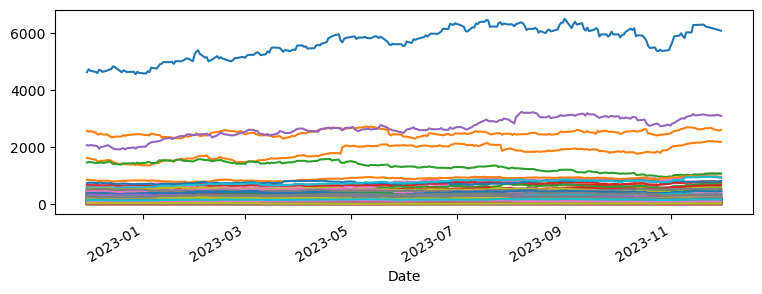

In [3]:

# I graphed each stock in sp500, to visualize the lines were analyzing
# Our trend line would follow Y = mx+b, we need the slope for each stock
sp500.plot(figsize = (9,3),legend= None) 

In [4]:
# Slope is our (y2-y1)[change of price] 
# divided by (x1-x2)[change of 1 year]
open_price = sp500.iloc[0] # first data entry
close_price = sp500.iloc[-1] # most recent data entry
price_difference = close_price - open_price
# Since our change of time is 1 year, im just going to divide by count of rows
slope = price_difference / len(sp500) * 100
slope

A      -10.445546
AAL     -0.819445
AAPL    16.455484
ABBV    -5.175182
ABNB     9.678571
          ...    
YUM     -0.600745
ZBH     -1.578134
ZBRA   -13.535872
ZION    -5.348978
ZTS      8.981481
Length: 500, dtype: float64

In [5]:
# Im assuming 260 day low refers to trading days in year
# Since we have roughly 251 rows of data, well get the low of what we have already
# Take the difference with our current price, then divide over the low
present_low_change = close_price - sp500.min()
percent_above_260 = (present_low_change / sp500.min()) * 100
percent_above_260 

A       26.094694
AAL     13.232598
AAPL    51.759414
ABBV     9.341782
ABNB    53.388292
          ...    
YUM      7.836708
ZBH     12.159266
ZBRA    19.283598
ZION    87.520746
ZTS     24.222511
Length: 500, dtype: float64

In [6]:
# Close - 4wk low , divided by 4week high - 4week low)
# subtract 
# Close - 52wk low , divided by 52week high - 52week low)
# notice the equation is same
# time period changes, im just gonna run a for loop with the formula
# and change the times for 4wk (20 data entries) and 52wk(all data entries)
data_indexes = (20, len(sp500))
oscillator_ratios = []
for index in data_indexes:
    close_minus_low= close_price - sp500[-index:].min()
    ratio = close_minus_low / (sp500[-index:].max() - sp500[-index:].min())
    oscillator_ratios.append(ratio)

oscillator = (oscillator_ratios[0] - oscillator_ratios[1]) *100
oscillator


#Note : he doesnt want us to use for loops but this one only loops twice, 
# and I only did it because the formula is redundant so I didnt want to write it twice 

A       53.605601
AAL     76.270254
AAPL    -8.331895
ABBV    37.400547
ABNB    15.507800
          ...    
YUM    -12.631780
ZBH     70.656313
ZBRA    72.655344
ZION    43.394896
ZTS      8.086581
Length: 500, dtype: float64

In [7]:
# 39 week returns sounds simple
# im going to use 5 data entries per week so were looking at 39 * 5, 195 data entries

price_39_weeks_ago = sp500.iloc[-195] # 195 data entries away (39 weeks | 5 entries per week)
price_difference_39_weeks = close_price - price_39_weeks_ago
price_difference_39_weeks # I think this is all we need for the return, right?



A      -14.837486
AAL     -3.505000
AAPL    39.878586
ABBV    -5.674667
ABNB     1.010002
          ...    
YUM     -2.105026
ZBH     -7.255371
ZBRA   -64.830399
ZION   -11.505074
ZTS      7.017502
Length: 500, dtype: float64

In [8]:
# 51 week volume price trend 
# Multiply weekly avg volume by percent change in price each of the past 51 weeks

# Can we just use std for volume?
# vpt = sum of (the weekly volumes * weekly price change )

In [9]:

sp500.index = pd.to_datetime(sp500.index)

# Just found out i can Resample to weekly frequency and calculate the mean and volume that way -_-. 
# 'W' stands for week
weekly_means = sp500.resample('W').mean()
weekly_std = sp500.resample('W').std()

vpt = weekly_means.pct_change() * weekly_std # Not sure if correct formula 
volume_price_trend = vpt.sum() 




In [10]:
# Made a neat table that can help with 
# calculations and saving our momentum factors


test = sp500.copy().transpose()

volume = sp500.std()
test['Volume'] = volume
means = sp500.mean()
test['Mean'] = means



new_table = test[['Volume', 'Mean']]
new_table # Needs a name



Date,Volume,Mean
A,15.327882,129.136001
AAL,1.882568,14.514583
AAPL,18.709873,167.338714
ABBV,7.605621,146.103211
ABNB,15.509396,120.450179
...,...,...
YUM,4.984311,128.731468
ZBH,10.718813,125.041679
ZBRA,33.712030,270.285911
ZION,8.301111,35.632431


In [11]:
new_table['Slope 52 Week Trend-Line'] = slope
new_table['Percent above 260'] = percent_above_260
new_table['4/52 Week Oscillator'] = oscillator
new_table['39 Week Return'] = price_difference_39_weeks
new_table['51 Week Volume Price Trend'] = volume_price_trend

/var/folders/6y/0l3pbhfs1bg6l9tz9cbfv4940000gp/T/ipykernel_47816/3713454937.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_table['Slope 52 Week Trend-Line'] = slope
/var/folders/6y/0l3pbhfs1bg6l9tz9cbfv4940000gp/T/ipykernel_47816/3713454937.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_table['Percent above 260'] = percent_above_260
/var/folders/6y/0l3pbhfs1bg6l9tz9cbfv4940000gp/T/ipykernel_47816/3713454937.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fro

In [12]:
new_table

Date,Volume,Mean,Slope 52 Week Trend-Line,Percent above 260,4/52 Week Oscillator,39 Week Return,51 Week Volume Price Trend
A,15.327882,129.136001,-10.445546,26.094694,53.605601,-14.837486,-0.156272
AAL,1.882568,14.514583,-0.819445,13.232598,76.270254,-3.505000,0.108232
AAPL,18.709873,167.338714,16.455484,51.759414,-8.331895,39.878586,0.484359
ABBV,7.605621,146.103211,-5.175182,9.341782,37.400547,-5.674667,-0.293304
ABNB,15.509396,120.450179,9.678571,53.388292,15.507800,1.010002,1.347010
...,...,...,...,...,...,...,...
YUM,4.984311,128.731468,-0.600745,7.836708,-12.631780,-2.105026,-0.099495
ZBH,10.718813,125.041679,-1.578134,12.159266,70.656313,-7.255371,-0.312715
ZBRA,33.712030,270.285911,-13.535872,19.283598,72.655344,-64.830399,-3.628587
ZION,8.301111,35.632431,-5.348978,87.520746,43.394896,-11.505074,-0.266008
